In [153]:
# Data Loading and Managing
import numpy as np
import pandas as pd
from tensorflow import keras

# Data Visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Model 
import xgboost as xgb
from sklearn.svm import SVR
from tensorflow.keras import layers
from sklearn.tree import  DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [154]:
import sklearn

In [155]:
# Set a random seed
seed = 42 
np.random.seed(42)

# Specify the path to the data file
file_path = 'dataset/ds_salaries.csv'

In [156]:
# Load data
df = pd.read_csv(filepath_or_buffer=file_path)

# Quick look
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [157]:
# Information about the data columns/features.=
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [158]:
# Cross check for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [159]:
# Extract all categorical columns
categorical_columns = df.columns[df.dtypes == 'object']

# Quick look
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [160]:
# Extract the sub-categories of each category
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col} : {unique_values}\n")

experience_level : ['SE' 'MI' 'EN' 'EX']

employment_type : ['FT' 'CT' 'FL' 'PT']

job_title : ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Da

In [161]:
# Descriptive analysis
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [162]:
# Extract the value counts for years
data_values = df.work_year.value_counts()

# Create a pie chart
fig = go.Figure(data=go.Pie(
    labels=data_values.index, 
    values=data_values.values, 
    hole=0.4, 
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(
        colors=px.colors.sequential.RdBu, 
        line=dict(
            color='honeydew', 
            width=2
        )
    ),
))

# Update layout
fig.update_layout(
    title="Distribution of Data Entries across Years",
    annotations=[dict(text="Year Overview", showarrow=False, font_size=20)],
    height=600
)

# Show the pie chart
fig.show()

In [163]:
# Understanding Salary Distribution
mean_salary = df.groupby('work_year')['salary_in_usd'].mean()

# Create subplots with shared x-axis
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=mean_salary.index,
    y=mean_salary.values,
    name="Mean Salary",
    marker=dict(color='steelblue') 
)
fig.add_trace(bar_trace)

# Add line trace
line_trace = go.Scatter(
    x=mean_salary.index,
    y=mean_salary.values,
    name="Mean Salary",
    mode="lines+markers", 
    line=dict(color='darkorange'),
    marker=dict(symbol='circle-open', size=15)
)
fig.add_trace(line_trace)

# Update layout
fig.update_layout(
    title="Examining Mean Salary by Year",
    xaxis_title="Working Year",
    yaxis_title="Mean Salary",
    height=600
)

# Show the combined plot
fig.show()

In [164]:
# Create the box plot
fig = px.box(
    data_frame=df, 
    x='work_year', 
    y='salary_in_usd', 
    color='work_year', 
    points='all', 
    height=600, 
    notched=True
)

# Update layout
fig.update_layout(
    title="Salary Distribution across Years",
    xaxis_title="Year",
    yaxis_title="Salary (USD)"
)

# Show the box plot
fig.show()

In [165]:
# Create the box plot
fig = px.box(
    data_frame=df, 
    x='work_year', 
    y='salary_in_usd', 
    color='work_year', 
    points='all', 
    height=600, 
    notched=True
)

# Update layout
fig.update_layout(
    title="Salary Distribution across Years",
    xaxis_title="Year",
    yaxis_title="Salary (USD)"
)

# Show the box plot
fig.show()

In [166]:
# Create a histogram with facet columns
fig = px.histogram(
    data_frame=df,
    x='experience_level',
    facet_col='work_year',
    nbins=7,
    text_auto=True,
    labels={'experience_level': 'Experience Level', 'count': 'Count'},
    title='Distribution of Experience Levels across Work Years'
)

# Configure histogram aesthetics
fig.update_traces(
    textposition='auto',
    marker_color='brown',
)

# Update layout
fig.update_layout(yaxis_title='Count')

# Show the histogram
fig.show()

In [167]:
# Determine the mean salary based on Experience Level
count_values = df.experience_level.value_counts()
salary_values = df.groupby('experience_level').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    pull=[0, 0, 0, 0.2],
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    pull=[0, 0.2, 0, 0],
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Experience Level",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)

# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Experience Levels",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [168]:
# Create box plots with facets
fig = px.box(df, x='experience_level', y='salary_in_usd', color='experience_level', facet_col='work_year')

# Update the layout
fig.update_layout(
    title="Salary Distribution by Experience Level",
    yaxis_title="Salary (USD)",
    height=600
)

# Show the figure
fig.show()

In [169]:
# Create violin plots with facets
fig = px.violin(df, x='experience_level', y='salary_in_usd', color='experience_level', facet_col='work_year', points='all')

# Update the layout
fig.update_layout(
    title="Salary Distribution by Experience Level",
    yaxis_title="Salary (USD)",
    height=600
)

# Show the figure
fig.show()

In [170]:
# Determine the mean salary based on Experience Level
count_values = df.employment_type.value_counts()
salary_values = df.groupby('employment_type').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Experience Level",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)
 
# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Experience Levels",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [171]:
# Create a box plot
box_plot = px.box(
    data_frame=df,
    x='employment_type',
    y='salary_in_usd',
    points='outliers',
    title="Salary Distribution across Employment Type",
    color='employment_type',
    notched=True
)

# Customize the layout
box_plot.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="Salary (USD)",
    height=600
)

# Show the box plot
box_plot.show()

# Create a facetted box plot
facet_box_plot = px.box(
    data_frame=df,
    x='employment_type',
    y='salary_in_usd',
    points='outliers',
    title="Salary Distribution across Employment Type",
    color='employment_type',
    facet_col='experience_level'
)

# Customize the layout
facet_box_plot.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="Salary (USD)",
    height=600
)

# Show the facetted box plot
facet_box_plot.show()

# Create a violin plot
violin_plot = px.violin(
    data_frame=df,
    x='employment_type',
    y='salary_in_usd',
    points='all',
    title="Salary Distribution across Employment Type",
    color='employment_type'
)

# Customize the layout
violin_plot.update_layout(
    xaxis_title="Employment Type",
    yaxis_title="Salary (USD)",
    height=600
)

# Show the violin plot
violin_plot.show()

In [172]:
# Create a box plot
box_plot = px.box(
    data_frame=df,
    x='work_year',
    y='salary_in_usd',
    color='employment_type',
    title="Salary Distribution across Employment Types",
    labels={'work_year': 'Work Year', 'salary_in_usd': 'Salary (USD)', 'employment_type': 'Employment Type'}
)

# Customize the layout
box_plot.update_layout(
    legend_title="Employment Type",
    height=600
)

# Show the box plot
box_plot.show()

In [173]:
# Create a Sunburst chart
fig = px.sunburst(df, path=['experience_level', 'employment_type', 'work_year'], values='salary_in_usd')

# Update layout settings
fig.update_layout(
    title='Total Salary Distribution by Work Year and Experience Level and Employment Type',  # Set the title
    height=600  # Set the height of the figure
)

# Display the figure
fig.show()

In [174]:
# Determine the mean salary based on Experience Level
count_values = df.company_size.value_counts()
salary_values = df.groupby('company_size').mean(
    numeric_only=True)['salary_in_usd']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

# Count of Experience Level
count_trace = go.Pie(
    labels=count_values.index,
    values=count_values.values,
    name="Value Counts"
)

# Salary based on Experience Level
salary_trace = go.Pie(
    labels=salary_values.index,
    values=salary_values.values,
    name="Mean Salary"
)

# Add traces to the subplots
fig.add_trace(count_trace, row=1, col=1)
fig.add_trace(salary_trace, row=1, col=2)

# Update the traces
fig.update_traces(
    textinfo='label+percent',
    hole=0.4,
    marker=dict(
        colors=px.colors.sequential.RdBu,
        line_color='lavender',
        line_width=2.5
    )
)

# Update the figure layout
fig.update_layout(
    title_text="Distribution based on Experience Level",
    height=600,
    annotations=[
        dict(
            text="Value Counts",
            font_size=17,
            showarrow=False,
            x=0.17
        ),
        dict(
            text="Mean Salary",
            font_size=20,
            showarrow=False,
            x=0.83
        )
    ]
)

# Show the final figure
fig.show()

# Create a figure
fig = make_subplots()

# Add bar trace
bar_trace = go.Bar(
    x=salary_values.index,
    y=salary_values.values,
    name="Mean Salary (Bar)",
    text=salary_values.values,
    marker=dict(
        color='brown',
        line_color='white',
        line_width=2.5,
    )
)

# Add traces to the figure
fig.add_trace(bar_trace)

# Update Layout
fig.update_layout(
    title="Mean Salary Distribution across Experience Levels",
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    height=600
)

# Show final figure
fig.show()

In [175]:
# Create a histogram
histogram = px.histogram(
    data_frame=df,
    x='salary_currency',
    y='salary_in_usd',
    text_auto=True,
    color='company_size',
    title='Salary Distribution by Currency',
    labels={'salary_currency': 'Salary Currency', 'salary_in_usd': 'Salary (USD)'}
)

# Customize the layout
histogram.update_layout(
    showlegend=True,
    height=600
)

# Show the histogram
histogram.show()

# Create a Bee Swarm plot
swarm_plot = px.strip(
    data_frame=df,
    x='salary_currency',
    y='salary_in_usd',
    color='company_size',
    title='Salary Distribution by Currency',
    labels={'salary_currency': 'Salary Currency', 'salary_in_usd': 'Salary (USD)'},
    hover_data={'salary_in_usd': ':$.2f'}
)

# Customize the layout
swarm_plot.update_layout(
    showlegend=True,
    height=600
)

# Show the Bee Swarm plot
swarm_plot.show()

In [176]:

# Calculate the count of matching and non-matching locations
location_counts = (df['company_location'] == df['employee_residence']).value_counts()

# Create a pie chart
pie_chart = px.pie(
    names=['Matching Locations', 'Non-Matching Locations'],
    values=location_counts.values,
    title='Matching vs Non-Matching Company and Employee Residence Locations',
    color_discrete_sequence=px.colors.sequential.RdBu,
    height=600,
    hole=0.4,
)

# Customize the layout
pie_chart.update_traces(
    insidetextorientation='radial',
    textinfo='label+percent',
    marker=dict(
        line=dict(
            color='honeydew',
            width=2
        )
    )
)

# Show the pie chart
pie_chart.show()

In [177]:
# Calculate the count of each remote ratio value
remote_counts = df['remote_ratio'].value_counts()

# Create a pie chart
fig = px.pie(
    names=remote_counts.index,
    values=remote_counts.values,
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.4,
    title="Remote Ratio Distribution",
    height=600
)

# Customize the layout
fig.update_traces(
    textinfo='label+percent',
    marker=dict(
        line=dict(
            color='honeydew',
            width=2
        )
    )
)

# Show the pie chart
fig.show()

In [178]:
# Histogram of Remote Ratio by Work Year
histogram = px.histogram(
    data_frame=df,
    x='remote_ratio',
    color='work_year',
    barmode='group',
    title='Remote Ratio Distribution by Work Year',
    labels={'remote_ratio': 'Remote Ratio', 'work_year': 'Work Year'},
    height=500
)
histogram.update_layout(showlegend=True)
histogram.show()

# Box Plot of Remote Ratio vs Salary by Work Year
box_plot = px.box(
    data_frame=df,
    x='remote_ratio',
    y='salary_in_usd',
    color='work_year',
    title='Remote Ratio vs Salary by Work Year',
    labels={'remote_ratio': 'Remote Ratio', 'salary_in_usd': 'Salary (USD)', 'work_year': 'Work Year'},
    height=500
)
box_plot.show()

# Sunburst Chart of Remote Ratio and Work Year
sunburst = px.sunburst(
    data_frame=df,
    path=['remote_ratio', 'work_year'],
    title='Remote Ratio and Work Year Hierarchy',
    height=500
)
sunburst.show()

In [179]:
# Make a copy for preserving original data.
processed_data = df.copy()

# Drop unwated columns
processed_data.drop(columns=['work_year', 'job_title', 'salary_currency', 'salary', 'employee_residence', 'company_location'], inplace=True)

# Rename the columns 
processed_data.columns = ['Exp_level', "Employment_Type", 'Salary', "Remote_Ratio", 'Cmp_Size']

# Quick Look
processed_data.tail()

,Exp_level,Employment_Type,Salary,Remote_Ratio,Cmp_Size
3750,SE,FT,412000,100,L
3751,MI,FT,151000,100,L
3752,EN,FT,105000,100,S
3753,EN,CT,100000,100,L
3754,SE,FT,94665,50,L


In [180]:
# Get the categorical columns
categorical_cols = processed_data.select_dtypes(include=['object']).columns

# A list to store all the encoder for later use
cat_encoders = {}

# Apply ordinal encoder to categorical columns
for col in categorical_cols:
    encoder = OrdinalEncoder()
    processed_data[col] = encoder.fit_transform(processed_data[[col]].to_numpy())
    cat_encoders[col] = encoder
    
# Final processed data
processed_data.head()

,Exp_level,Employment_Type,Salary,Remote_Ratio,Cmp_Size
0,3.0,2.0,85847,100,0.0
1,2.0,0.0,30000,100,2.0
2,2.0,0.0,25500,100,2.0
3,3.0,2.0,175000,100,1.0
4,3.0,2.0,120000,100,1.0


In [181]:
# Initialize Standard Scaler
scaler = StandardScaler()

# Splitted into features and tagert
mirror_data = processed_data.copy()
target = mirror_data.pop('Salary').to_numpy()
features = mirror_data.to_numpy()

# Apply standard scaler
scalled_data = scaler.fit_transform(features)

In [182]:
# Generate feature correlation
linear_corr = processed_data.corr(method='pearson').round(2)

# Visualize correlation
corr_heatmap = px.imshow(linear_corr,
                         text_auto=True,
                         labels=dict(x="Features", y="Features",
                                     color="Correlation"),
                         color_continuous_scale=px.colors.sequential.RdBu,
                         title="Linear Correlation (Heatmap)",
                         height=600
                         )

corr_heatmap.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_title="Features",
    yaxis_title="Features",
    coloraxis_colorbar_title="Correlation"
)

corr_heatmap.show()

In [183]:
train_stat = df.describe(percentiles = [.05,.1, .9,.95])
train_stat

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
5%,2021.000000,4.500000e+04,40143.700000,0.000000
10%,2022.000000,6.000000e+04,59537.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
90%,2023.000000,2.286000e+05,219000.000000,100.000000
95%,2023.000000,2.600000e+05,249360.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [184]:
train_stat.loc['max',:]-train_stat.loc['95%',:]

work_year               0.0
salary           30140000.0
salary_in_usd      200640.0
remote_ratio            0.0
dtype: float64

In [185]:
train_stat.loc['95%',:]-train_stat.loc['90%',:]

work_year            0.0
salary           31400.0
salary_in_usd    30360.0
remote_ratio         0.0
dtype: float64

In [186]:
(train_stat.loc['max',:]-train_stat.loc['95%',:])/(train_stat.loc['95%',:]-train_stat.loc['90%',:])

work_year               NaN
salary           959.872611
salary_in_usd      6.608696
remote_ratio            NaN
dtype: float64

In [187]:
train_stat.loc['10%',:]-train_stat.loc['5%',:]

work_year            1.0
salary           15000.0
salary_in_usd    19393.3
remote_ratio         0.0
dtype: float64

In [188]:
train_stat.loc['5%',:]-train_stat.loc['min',:]

work_year            1.0
salary           39000.0
salary_in_usd    35011.7
remote_ratio         0.0
dtype: float64

In [189]:
(train_stat.loc['5%',:]-train_stat.loc['min',:])/(train_stat.loc['10%',:]-train_stat.loc['5%',:])

work_year        1.00000
salary           2.60000
salary_in_usd    1.80535
remote_ratio         NaN
dtype: float64

In [190]:
train_stat.loc[['10%','90%','95%'],:]

,work_year,salary,salary_in_usd,remote_ratio
10%,2022.0,60000.0,59537.0,0.0
90%,2023.0,228600.0,219000.0,100.0
95%,2023.0,260000.0,249360.0,100.0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [192]:
def abnormal_filter(df, threshold_first, threshold_second):
    # Abnormal values filter for DataFrame df:
    # threshold_first (5%-min or max-95%)
    # threshold_second (second diff., times)
    df_describe = df.describe([.05, .1, .9, .95])
    cols = df_describe.columns.tolist()
    i = 0
    abnorm = 0
    for col in cols:
        i += 1
        # abnormal smallest
        P10_5 = df_describe.loc['10%',col]-df_describe.loc['5%',col]
        P_max_min = df_describe.loc['max',col]-df_describe.loc['min',col]
        if P10_5 != 0:
            if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P10_5 > threshold_second:
                #abnormal smallest filter
                df = df[(df[col] >= df_describe.loc['5%',col])]
                print('1: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['10%',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if (df_describe.loc['5%',col]-df_describe.loc['min',col])/P_max_min > threshold_first:
                    # abnormal smallest filter
                    df = df[(df[col] >= df_describe.loc['5%',col])]
                    print('2: ', i, col, df_describe.loc['min',col],df_describe.loc['5%',col],df_describe.loc['max',col])
                    abnorm += 1

        
        # abnormal biggest
        P95_90 = df_describe.loc['95%',col]-df_describe.loc['90%',col]
        if P95_90 != 0:
            if (df_describe.loc['max',col]-df_describe.loc['95%',col])/P95_90 > threshold_second:
                #abnormal biggest filter
                df = df[(df[col] <= df_describe.loc['95%',col])]
                print('3: ', i, col, df_describe.loc['90%',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                abnorm += 1
        else:
            if P_max_min > 0:
                if ((df_describe.loc['max',col]-df_describe.loc['95%',col])/P_max_min > threshold_first) & (df_describe.loc['95%',col] > 0):
                    # abnormal biggest filter
                    df = df[(df[col] <= df_describe.loc['95%',col])]
                    print('4: ', i, col, df_describe.loc['min',col],df_describe.loc['95%',col],df_describe.loc['max',col])
                    abnorm += 1
    print('Number of abnormal values =', abnorm)
    return df

In [193]:
df = abnormal_filter(df, 0.5, 3)
df.info()

3:  2 salary 228599.9999999999 260000.0 30400000.0
3:  3 salary_in_usd 219000.0 249359.99999999994 450000.0
Number of abnormal values = 2
<class 'pandas.core.frame.DataFrame'>
Index: 3495 entries, 0 to 3753
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3495 non-null   int64 
 1   experience_level    3495 non-null   object
 2   employment_type     3495 non-null   object
 3   job_title           3495 non-null   object
 4   salary              3495 non-null   int64 
 5   salary_currency     3495 non-null   object
 6   salary_in_usd       3495 non-null   int64 
 7   employee_residence  3495 non-null   object
 8   remote_ratio        3495 non-null   int64 
 9   company_location    3495 non-null   object
 10  company_size        3495 non-null   object
dtypes: int64(4), object(7)
memory usage: 327.7+ KB


In [194]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.width', None) # display DataFrame without line wrapping

encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include="object").columns

# Fit and transform all categorical columns together
df[categorical_cols] = df[categorical_cols].apply(lambda x: encoder.fit_transform(x))

In [195]:
import pickle
# Let's dump the mode
pickle.dump(encoder,open(r'C:\Users\acer\OneDrive\Documents\GitHub\waseem-avi\week1_ml_project\project_files\datafiles\encoder.pkl','wb'))

In [196]:
X = df.drop(["salary_in_usd", "salary"], axis=1)
y = df["salary_in_usd"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
x_test.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3121,2022,3,2,44,11,73,0,67,0
3281,2022,3,2,44,11,73,100,67,1
2343,2022,3,2,44,11,73,100,67,1
2744,2022,3,2,44,11,73,0,67,1
343,2023,3,2,65,11,73,0,67,1


In [197]:
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

print(f"Model Coefficient is : {lr.coef_}\n")
print(f"Model Intercept is : {lr.intercept_}\n")
print("R2 Score: ", round(r2_score(y_test, preds),3))

Model Coefficient is : [ 6.60415891e+03  1.45196262e+04  2.55602280e+04  4.27552894e+02
  6.20649381e+03  4.16159805e+02  1.42553472e+01  2.41931373e+02
 -9.09170559e+03]

Model Intercept is : -13425335.078965284

R2 Score:  0.307


In [198]:
lasso = Lasso(alpha = 0.2)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

print(f'Lasso coefficients: ,{lasso.coef_}\n')
print('Lasso score: ',round(lasso.score(x_test, y_test), 3))

Lasso coefficients: ,[ 6.60361198e+03  1.45192582e+04  2.55438106e+04  4.27546465e+02
  6.20625122e+03  4.16145264e+02  1.42534702e+01  2.41970602e+02
 -9.09014287e+03]

Lasso score:  0.307


In [199]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)


print("R2 Score: ", round(r2_score(y_test, rf_pred),3))

R2 Score:  0.433


In [200]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,78,80000,6,85847,26,100,24,0
1,2023,2,0,62,30000,11,30000,73,100,67,2
2,2023,2,0,62,25500,11,25500,73,100,67,2
3,2023,3,2,44,175000,11,175000,11,100,12,1
4,2023,3,2,44,120000,11,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3748,2021,2,2,31,24000,6,28369,51,50,47,0
3749,2021,3,2,46,165000,11,165000,73,100,67,0
3751,2021,2,2,78,151000,11,151000,73,100,67,0
3752,2020,0,2,44,105000,11,105000,73,100,67,2


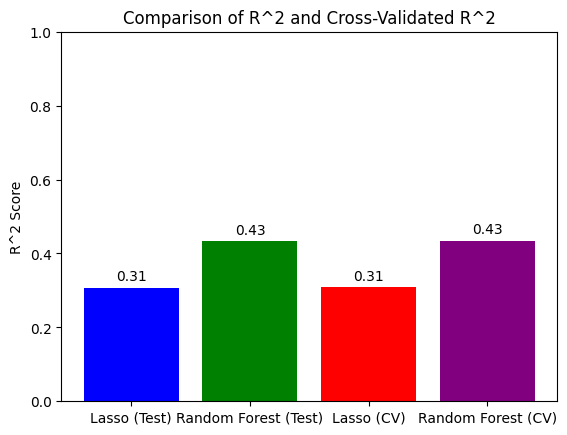

In [201]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

lasso_r2 = lasso.score(x_test, y_test)
rf_r2 = r2_score(y_test, rf_pred)
lasso_cv_r2 = cross_val_score(lasso, x_train, y_train, cv=5, scoring='r2')
rf_cv_r2 = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')


labels = ['Lasso (Test)', 'Random Forest (Test)', 'Lasso (CV)', 'Random Forest (CV)']
values = [lasso_r2, rf_r2, np.mean(lasso_cv_r2), np.mean(rf_cv_r2)]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green', 'red', 'purple'])

plt.ylim(0, 1)  
plt.title('Comparison of R^2 and Cross-Validated R^2')
plt.ylabel('R^2 Score')


def autolabel(rects):
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

plt.show()

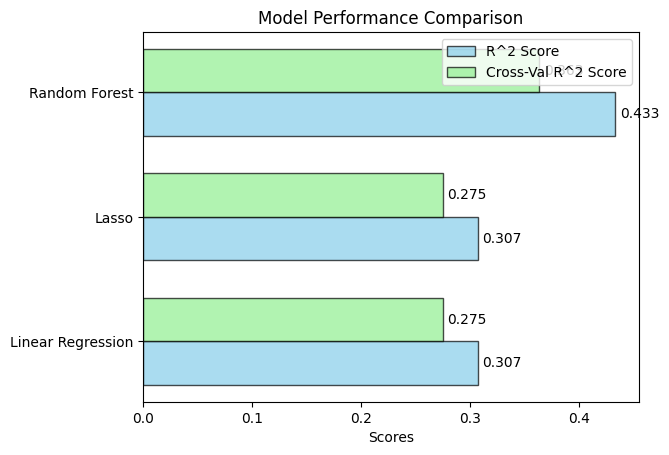

In [202]:
import numpy as np
import matplotlib.pyplot as plt


models = ['Linear Regression', 'Lasso', 'Random Forest']
r2_scores = [round(r2_score(y_test, lr.predict(x_test)), 3),
              round(r2_score(y_test, lasso.predict(x_test)), 3),
              round(r2_score(y_test, rf.predict(x_test)), 3)]
cv_scores = [np.mean(cross_val_score(lr, X, y)), np.mean(cross_val_score(lasso, X, y)), np.mean(cross_val_score(rf, X, y))]

y = np.arange(len(models))  
height = 0.35

fig, ax = plt.subplots()
rects1 = ax.barh(y - height/2, r2_scores, height, label='R^2 Score', color='skyblue', alpha=0.7, edgecolor='black')
rects2 = ax.barh(y + height/2, cv_scores, height, label='Cross-Val R^2 Score', color='lightgreen', alpha=0.7, edgecolor='black')

ax.set_title('Model Performance Comparison')
ax.set_xlabel('Scores') 
ax.set_yticks(y)
ax.set_yticklabels(models)
ax.legend()

for rect in rects1 + rects2:
    width = rect.get_width()  
    ax.annotate('{}'.format(round(width, 3)),
                xy=(width, rect.get_y() + rect.get_height() / 2),
                xytext=(3, 0),  
                textcoords="offset points",
                ha="left", va="center") 

plt.show()

In [203]:
# Let's dump the model
import pickle
# Let's dump the mode
pickle.dump(lr,open(r'C:\Users\acer\OneDrive\Documents\GitHub\waseem-avi\week1_ml_project\project_files\datafiles\LinearRegression.pkl','wb'))